In [214]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import seaborn as sns
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
import torchvision.models as models           # for pretrained models
from torchsummary import summary              # for getting the summary of our model

The Dataset folder has two subfolders, train and valid, that represent the training and validation sets.\
The two sets have a 80-20 division ratio.\
The train and valid folders have subfolders corresponding to the 38 classes, for instance "/train/Tomato___Spider_mites" represents one possible label.\
This folder structure simplifies the preprocessing of the data using torchvision python library.

In [187]:
data_dir = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [188]:
# Print Labels
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [189]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


For some quick statistics we are exploring the folders corresponding to the possible classes.

In [190]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [191]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [192]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [193]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


With the following observations of the data we concluded that the dataset was already balanced.

In [194]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


no. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___Powdery_mildew                     1683
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___healthy                                       1859
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___Late_blight                                         1939
Potato___healthy                                             1824
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___Leaf_scorch                                     1774
Strawberry___healthy                                         1824
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Target_Spot                                         1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Tomato_mosaic_virus                                 1790
Tomato___healthy                                             1926

Text(0.5, 1.0, 'Images per each class of plant disease')

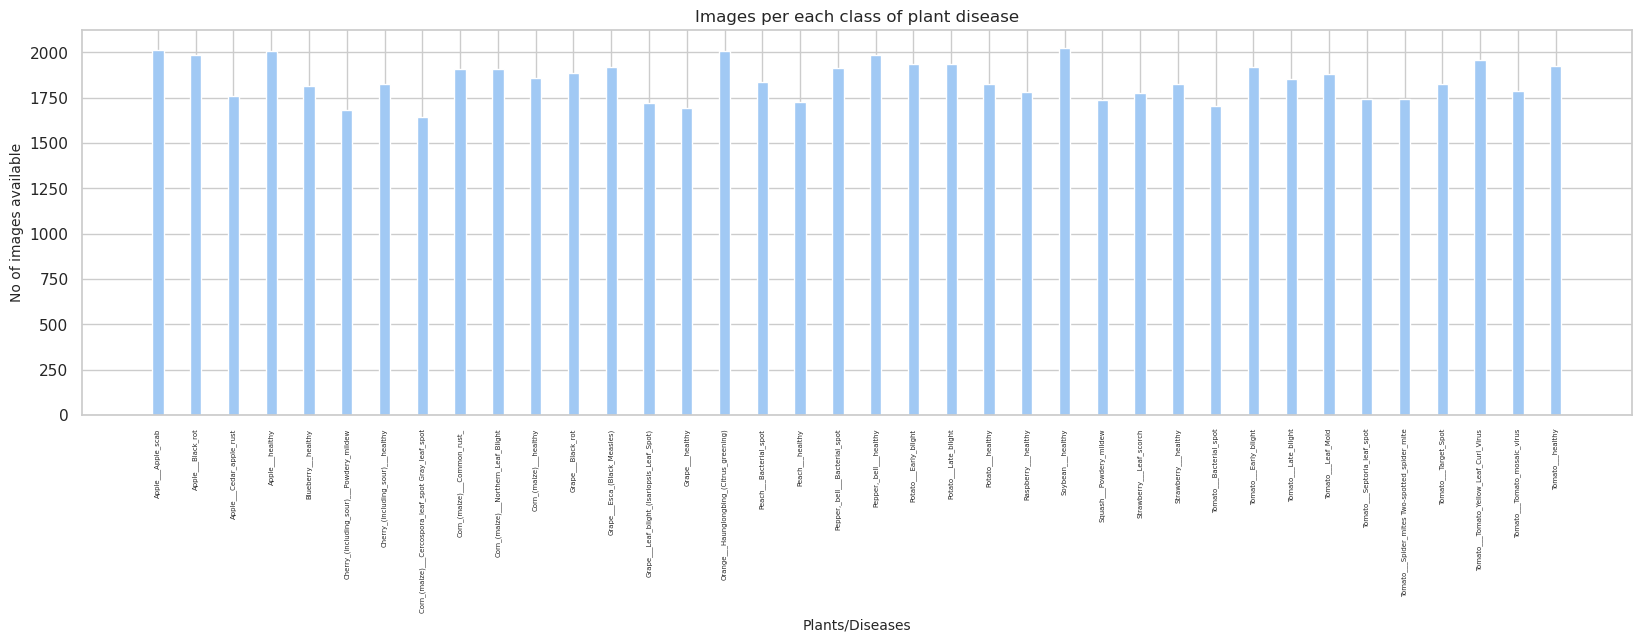

In [195]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [196]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


As previously mentioned, the folder structured is optimal for loading using ImageFolder.

Where the images are already arranged this way:
```
root/class1/xxx.png
root/class1/xxy.png
root/class1/[...]/xxz.png

root/class2/123.png
root/class2/nsdf3.png
root/class2/[...]/asd932_.png
```

This means that the folder were the image is corresponds to the corresponding class.\
Then this class will transform each image to a pytoch tensor and store them in a dataset.

In [197]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [198]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [199]:
# total number of classes in train set
len(train.classes)

38

In [200]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


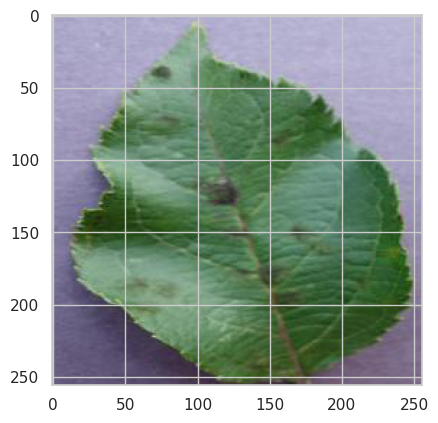

In [201]:
show_image(*train[0])

Label :Tomato___healthy(37)


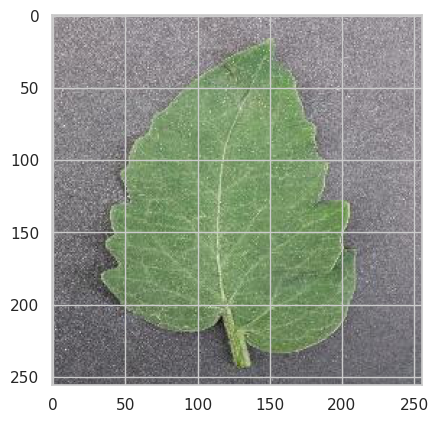

In [202]:
show_image(*train[70000])

Label :Peach___Bacterial_spot(16)


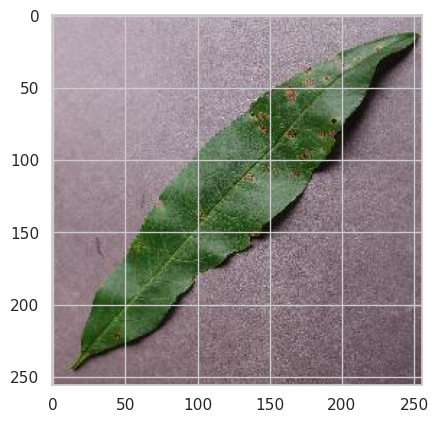

In [203]:
show_image(*train[30000])

A Dataset stores the sample and their corresponding labels.\
The DataLoader class wraps and iterable around the Dataset to enable easy access to the samples.

In [204]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [205]:
# setting the batch size
batch_size = 32

In [206]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [207]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

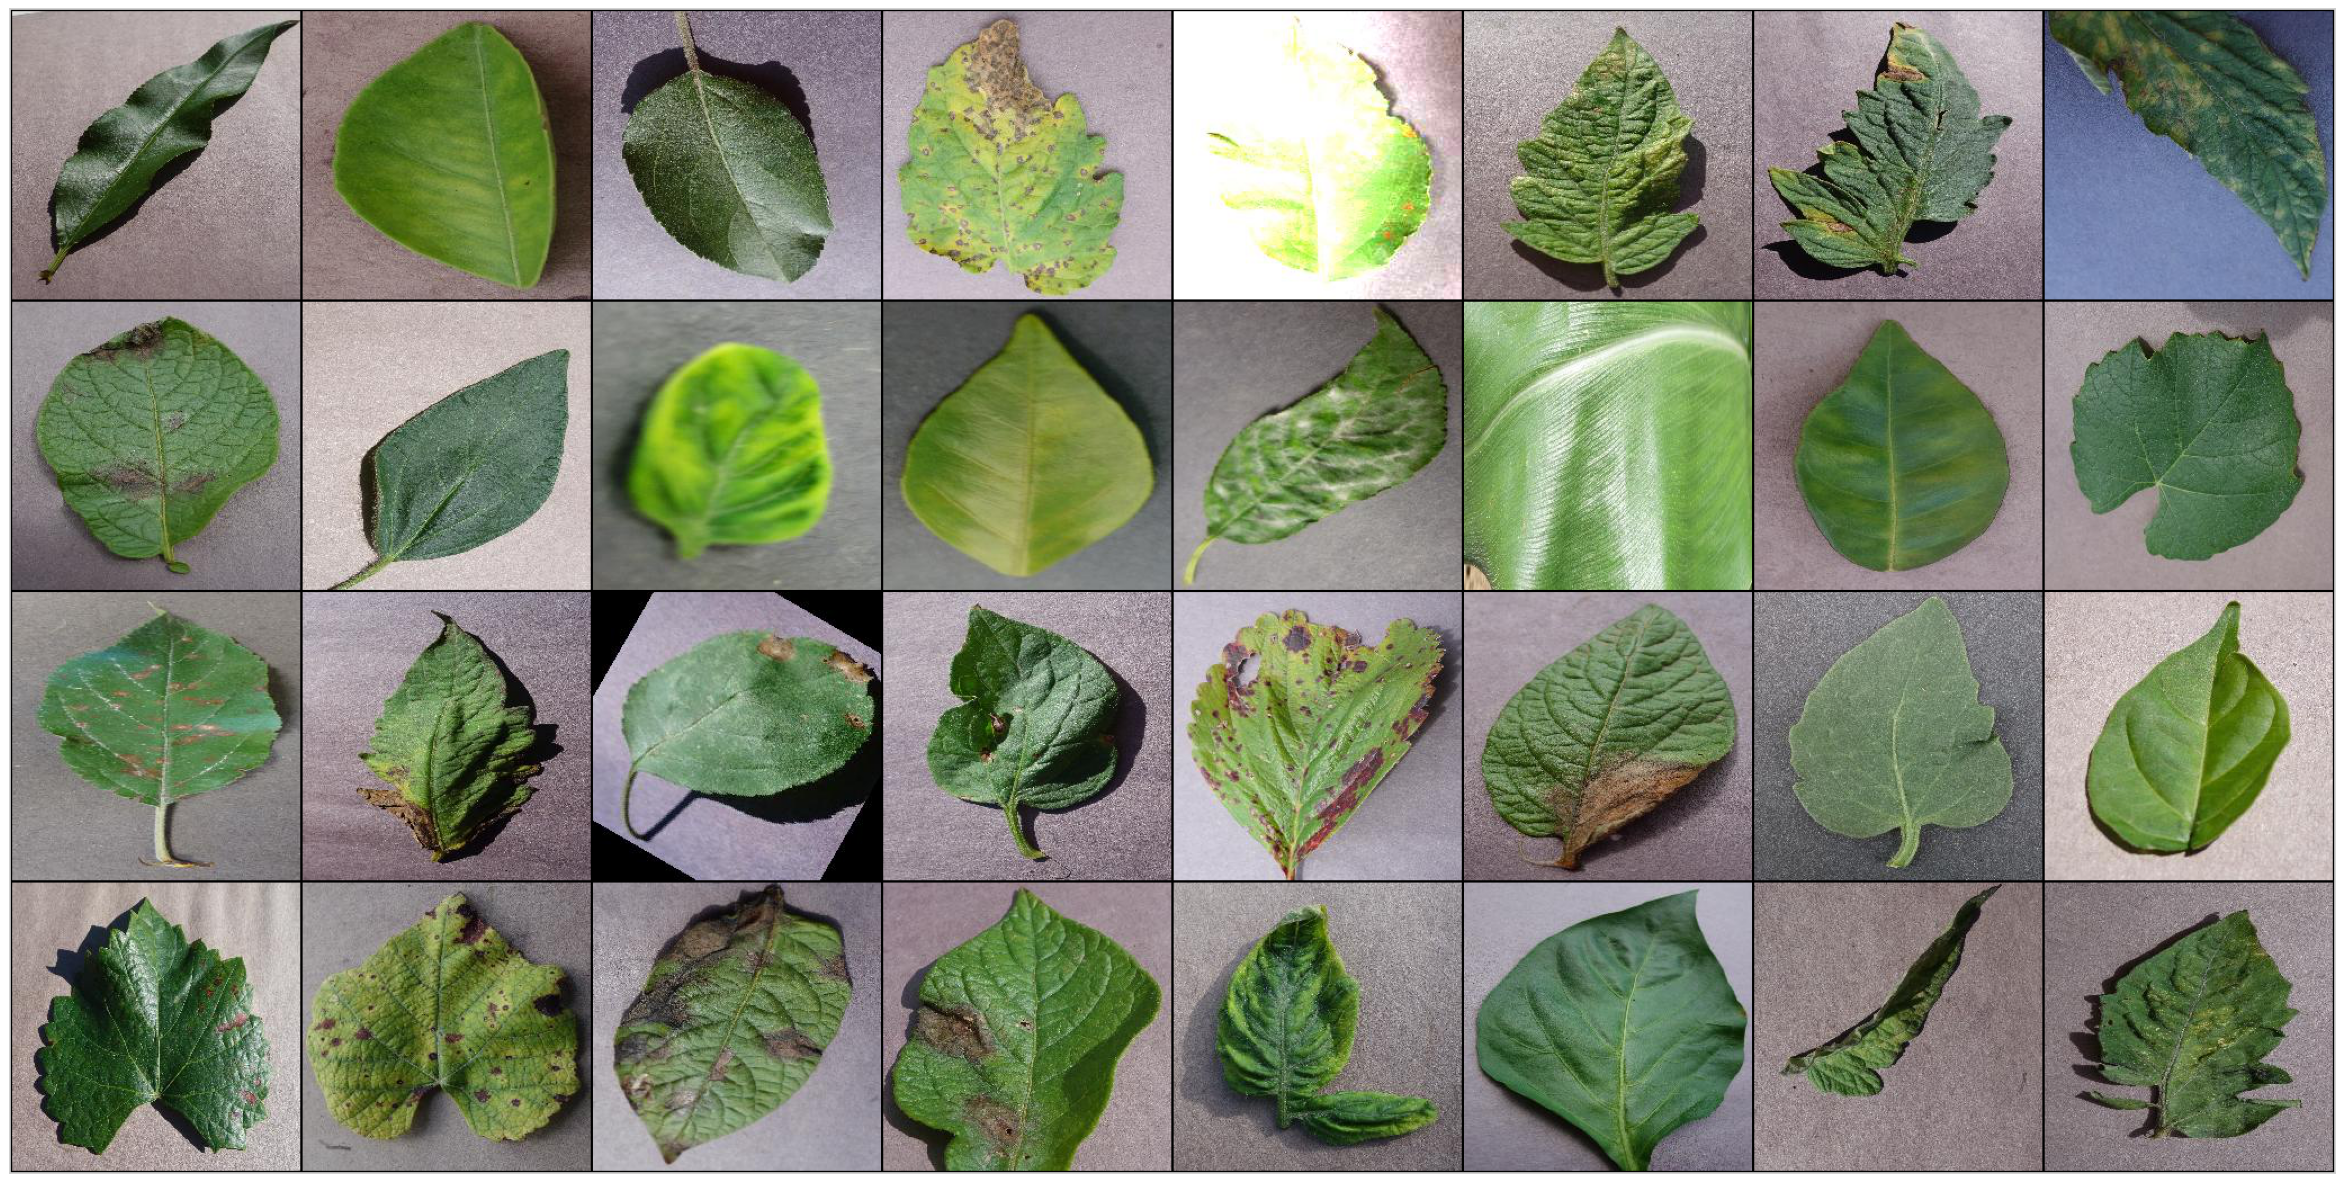

In [208]:
# Images for first batch of training
show_batch(train_dl) 

In [209]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [210]:
device = get_default_device()
device

device(type='cuda')

In [211]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
# Load pre-trained ResNet model
model = models.resnet50(pretrained=True)

# Freeze pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Modify the last fully connected layer
num_classes = len(your_dataset_classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation loop
model.eval()
with torch.no_grad():
    for inputs, labels in validation_dataloader:
        outputs = model(inputs)
        # Calculate metrics
